# Quantum State Transformation Exercise

This code demonstrates how repeated application of a IDENTITY gate affects a quantum state.
We explore two scenarios: an ideal IDENTITY gate and a faulty IDENTITY gate with a small epsilon error.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize the zero quantum state

In [2]:
# Represent the quantum state as a column vector.
zero_state = np.array([[1], [0]])

## Define the IDENTITY gate
The IDENTITY gate preserves the quantum state.

In [3]:
gate_name = "IDENTITY"
identity_gate = np.array([[1, 0], [0, 1]])

## Initialize variables for plotting

In [4]:
iterations = 50
ideal_states = []

## Apply the IDENTITY gate repeatedly
If you have a statevector, it explicitly describes the quantum state of a system. For a single qubit, the statevector is represented as:

$$
|\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix},
$$

where $\alpha$ is the amplitude for the $|0\rangle$ state and $\beta$ is the amplitude for the $|1\rangle$ state.

The probability of measuring $|0\rangle$ is simply:
$$P(0) = |\alpha|^2.$$



In [5]:
state = zero_state.copy()
for i in range(iterations):
    ideal_states.append(abs(state[0])**2)  # Append the probability of |0>
    state = identity_gate @ state  # @ operator multiplies matrices

## Plot the results of the ideal NOT gate

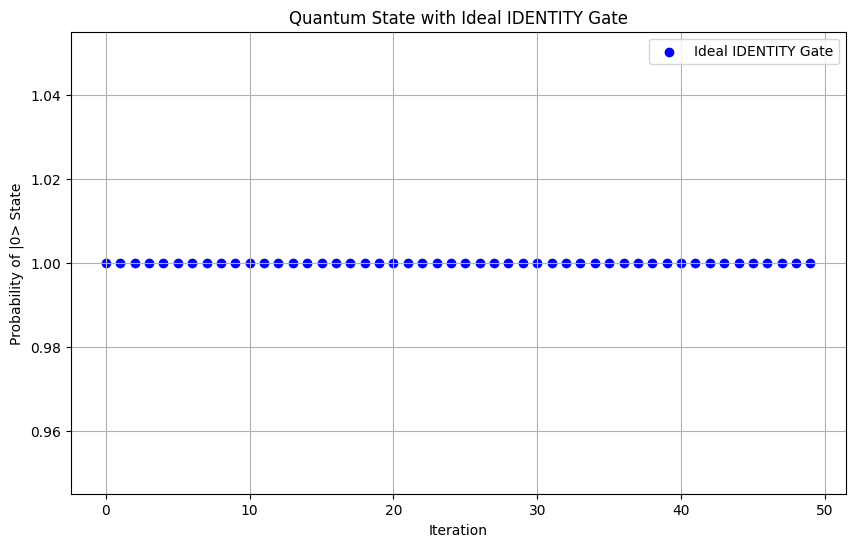

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(range(iterations), ideal_states,
            color='blue',
            label=f'Ideal {gate_name} Gate')
plt.title(f'Quantum State with Ideal {gate_name} Gate')
plt.xlabel('Iteration')
plt.ylabel('Probability of |0> State')
plt.legend()
plt.grid()
plt.show()

## Introduce epsilon error to the IDENTITY gate
Add a small error to the IDENTITY gate to simulate imperfection.

In [7]:
def create_unitary_matrix(epsilon):
    """
    Create a 2x2 unitary matrix that slightly deviates from the identity matrix.

    Parameters:
        epsilon (float): A small deviation parameter.

    Returns:
        np.ndarray: A 2x2 unitary matrix.
    """
    # Construct the matrix with epsilon
    U = np.array([
        [1, epsilon],
        [-epsilon, 1]
    ], dtype=complex)

    # Normalize the rows to ensure unitarity
    U[0] = U[0] / np.linalg.norm(U[0])
    U[1] = U[1] / np.linalg.norm(U[1])

    return U

epsilon = 0.01
faulty_identity_gate = create_unitary_matrix(epsilon)

### Check that the matrix is unitary

In [8]:
def is_unitary(matrix, tol=1e-10):
    """
    Check if a matrix is unitary.

    Args:
        matrix (np.ndarray): The matrix to check.
        tol (float): Tolerance for floating-point comparison.

    Returns:
        bool: True if the matrix is unitary, False otherwise.
    """
    # Compute the conjugate transpose of the matrix
    matrix_dagger = np.conjugate(matrix.T)

    # Check if U^dagger * U is approximately the identity matrix
    identity = np.eye(matrix.shape[0], dtype=matrix.dtype)
    return np.allclose(matrix_dagger @ matrix, identity, atol=tol)

if is_unitary(faulty_identity_gate):
    print("All is well: matrix is unitary.")
else:
    print("Error: matrix is not unitary. "
          "The code will work, but faulty_NOT_gate is not a quantum gate. "
          "Please fix it.")
print(f"It looks as follows:\n{faulty_identity_gate}")

All is well: matrix is unitary.
It looks as follows:
[[ 0.99995  +0.j  0.0099995+0.j]
 [-0.0099995+0.j  0.99995  +0.j]]


## Initialize variables for the faulty gate

In [9]:
faulty_states = []
state = zero_state.copy()

## Apply the faulty IDENTITY gate repeatedly

In [10]:
for i in range(iterations):
    faulty_states.append(abs(state[0])**2)  # Append the probability of |0>
    state = faulty_identity_gate @ state


## Plot the results of the faulty IDENTITY gate

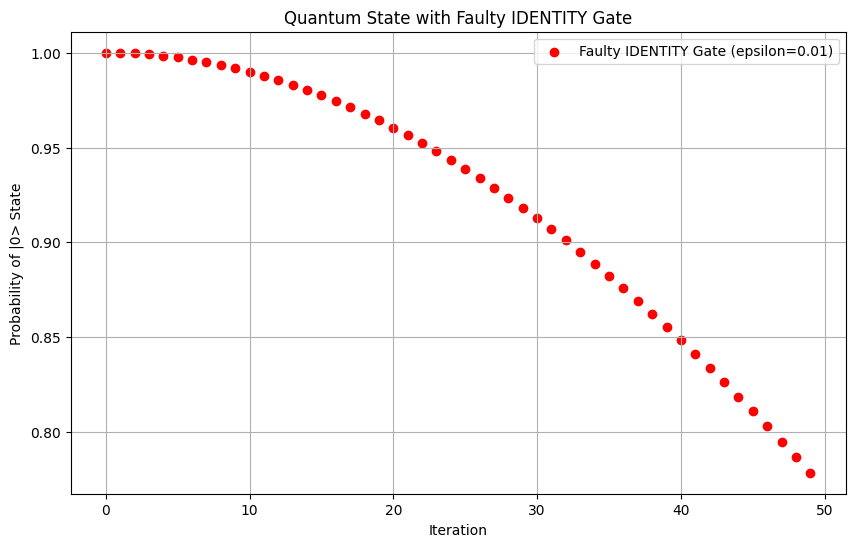

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(range(iterations), faulty_states,
            color='red',
            label=f'Faulty {gate_name} Gate (epsilon={epsilon})')
plt.title(f'Quantum State with Faulty {gate_name} Gate')
plt.xlabel('Iteration')
plt.ylabel('Probability of |0> State')
plt.legend()
plt.grid()
plt.show()

## Tasks

The scatter plots above illustrate the evolution of a quantum state when subjected to ideal and faulty IDENTITY gates. Let’s experiment with the code.


1. Set the value of `epsilon` to `0.001`.  
   - Observe how the probability of the $|0\rangle$ state changes.  

2. Set the value of `epsilon` to `0.1`.  
   - Analyze the impact on the probability of the $|0\rangle$ state.

3. Apply a non-unitary matrix to the state. For example, set
```python
faulty_identity_gate = np.array([[1, 0.01], [0.01, 1]])
```
   - Explore what happens to the probability of the $|0\rangle$ state.

4. Upload three generated plots for your group to D2L.



## Summary and Further Reading

In this lab, we explored a simplified and abstract example of the errors encountered while executing a quantum program. The simplicity is intentional, as it aids in building an intuitive understanding of the problem. There are [numerous sources of errors](https://docs.quantum.ibm.com/guides/build-noise-models#quantum-errors) that can be simulated by constructing the code from scratch. However, a more practical approach is to utilize existing implementations of such simulators. For instance, Qiskit Aer [allows us](https://docs.quantum.ibm.com/guides/build-noise-models) to define the effects of various noise types with minimal effort by leveraging prebuilt tools.

Why use a simulator? Errors in quantum systems are often modeled as probabilistic processes where outcomes are chosen randomly based on assigned probabilities. This requires running the code multiple times to compute expected values accurately. For example, [this guide](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.noise.reset_error.html) illustrates how to model a spontaneous return to the $|0⟩$ or $|1⟩$ state with probabilities $p_0$ and $p_1$, respectively.

Here is a toy example showing how we can simulate a random reset from $|0⟩$ to $|1⟩$ with $p_\text{flip} = 0.1$ .

In [12]:
# Set the seed for reproducibility
np.random.seed(42)

# Parameters
num_trials = 1000  # Number of trials in the simulation
p_flip = 0.1       # Probability of flipping to |1> state

# Initialize variables
states = []  # List to store the state for each trial
num_flips_to_1 = 0  # Counter for the number of flips to |1>

# Simulate flipping with a for loop
for trial in range(num_trials):
    # Generate a random number between 0 and 1
    random_number = np.random.rand()

    # Check if the state flips to |1>
    if random_number < p_flip:
        states.append(1)  # Flip to |1>
        num_flips_to_1 += 1
    else:
        states.append(0)  # Remain in |0>

# Calculate the proportion of flips to |1>
proportion_flipped = num_flips_to_1 / num_trials

# Display results
print(f"Total Trials: {num_trials}")
print(f"Probability of Flipping (p): {p_flip}")
print(f"Number of Flips to |1>: {num_flips_to_1}")
print(f"Proportion Flipped to |1>: {proportion_flipped:.3f}")

Total Trials: 1000
Probability of Flipping (p): 0.1
Number of Flips to |1>: 108
Proportion Flipped to |1>: 0.108


Think:
1. Why isn't the proportion of flipped states equal to 0.1?
2. What occurs if we do not set the seed?